In [ ]:
!pwd
!ls

/content/drive/MyDrive
 Among.Us.v2020.9.9s.zip   IMG_20210321_163027.jpg    'Untitled folder'
 Classroom		   IMG_20210321_163028.jpg    'Untitled Jam.gjam'
'Colab Notebooks'	   IMG_20210321_164114.jpg     VID_20210321_114916.mp4
'Family '		   IMG_20210321_164705.jpg     VID_20210321_115117.mp4
'Hamsaladeevi '		   IMG_20210321_165006.jpg     VID_20210321_115326.mp4
 img093.jpg		   income_dataset.csv	       VID_20210321_115338.mp4
 IMG_20210321_133032.jpg   museums.csv		       VID_20210321_163429.mp4
 IMG_20210321_162736.jpg   Pics			       VID_20210321_163752.mp4
 IMG_20210321_162904.jpg   t10k-images-idx3-ubyte.gz   VID_20210321_163845.mp4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive


Mounted at /content/drive
/
/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
income_dset = pd.read_csv('income_dataset.csv').dropna()
data_work=[]
data_work=income_dset["workclass"]
workclass=array(data_work)

label_encWorkcls=LabelEncoder()
integer_encWorkclass=label_encWorkcls.fit_transform(workclass)
trgt = pd.DataFrame(integer_encWorkclass, columns=["workclass"])
income_dset['workclass_int']= trgt['workclass']

In [ ]:

data_marital=[]
data_marital=income_dset["marital.status"]
Marital=array(data_marital)

label_encMarital=LabelEncoder()
integer_encMaritalStats=label_encMarital.fit_transform(Marital)

trgt = pd.DataFrame(integer_encMaritalStats, columns=["marital.status"])
income_dset['marital.status_int']= trgt['marital.status']


In [ ]:

data=[]
data = income_dset["income"]
values = array(data)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

trgt = pd.DataFrame(integer_encoded, columns=["trgt_variable"])

income_dset['target_var']= trgt['trgt_variable']


In [ ]:
for col in income_dset.columns:
  if income_dset[col].dtype == object: 
    income_dset=income_dset.drop(income_dset[income_dset.workclass.str.contains(r'[?]') | income_dset.occupation.str.contains(r'[?]')| income_dset["native.country"].str.contains(r'[?]')].index)
print(income_dset.shape)

(30162, 18)


In [ ]:
for clmn in income_dset.columns:
    if income_dset[clmn].dtype == object:
        print(str(clmn))
        income_dset[clmn] = income_dset[clmn].astype('category')
    else:
        pass

print(income_dset.shape)

workclass
education
marital.status
occupation
relationship
race
sex
native.country
income
(30162, 18)


In [ ]:
income_dset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_int,marital.status_int,target_var
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,4.099529,2.580134,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,1.140930,1.498016,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,4.000000,2.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,4.000000,2.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,4.000000,4.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,8.000000,6.000000,1.000000


In [ ]:
income_dset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_int,marital.status_int,target_var
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,4,6,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,4,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,4,5,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,4,0,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,4,5,0


In [ ]:
normalized_df = income_dset.copy()
for col in income_dset.columns:
    if str(income_dset[col].dtype) != 'category':
        normalized_df[col]=(income_dset[col]-income_dset[col].min())/(income_dset[col].max()-income_dset[col].min())
normalized_df.shape

(30162, 18)

In [ ]:
normalized_df.drop(normalized_df.columns[[1,3,5,6,7,8,9,13,14]], inplace = True, axis=1)
normalized_df.shape
normalized_df.head(10)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_int,marital.status_int,target_var
1,0.890411,0.080970,0.533333,0.0,1.000000,0.173469,0.428571,1.000000,0.0
3,0.506849,0.086061,0.200000,0.0,0.895317,0.397959,0.428571,0.000000,0.0
4,0.328767,0.170568,0.600000,0.0,0.895317,0.397959,0.428571,0.833333,0.0
5,0.232877,0.138072,0.533333,0.0,0.865473,0.448980,0.428571,0.000000,0.0
6,0.287671,0.093024,0.333333,0.0,0.865473,0.397959,0.428571,0.833333,0.0
7,0.780822,0.050899,1.000000,0.0,0.845500,0.193878,0.857143,0.666667,1.0
8,0.698630,0.277540,0.533333,0.0,0.845500,0.397959,0.000000,0.000000,0.0
10,0.383562,0.107758,1.000000,0.0,0.689624,0.346939,0.428571,0.000000,1.0
11,0.287671,0.102491,0.933333,0.0,0.648301,0.448980,0.714286,0.666667,1.0
12,0.479452,0.078459,0.800000,0.0,0.648301,0.193878,0.428571,1.000000,1.0


In [ ]:
target_variable = "target_var"
idx_target_var = list(normalized_df.columns).index(target_variable)
number_of_rows = np.array(normalized_df).shape[0]
random_indices_train = np.random.choice(number_of_rows, size= int(0.8*number_of_rows), replace=False)
random_indices_test = np.setdiff1d(np.arange(normalized_df.shape[0]),random_indices_train)
train_data= np.array(normalized_df)[random_indices_train, :]
test_data= np.array(normalized_df)[random_indices_test, :]
train_X = np.delete(train_data, np.s_[idx_target_var:idx_target_var+1], axis=1)    
test_X = np.delete(test_data, np.s_[idx_target_var:idx_target_var+1], axis=1)
train_y = train_data[:,idx_target_var]
test_y = test_data[:,idx_target_var]
print('Shape train_x',train_X.shape)
print('Shape train_Y',train_y.shape)
print('Shape test_x',test_X.shape)
print('Shape test_y',test_y.shape)

Shape train_x (24129, 8)
Shape train_Y (24129,)
Shape test_x (6033, 8)
Shape test_y (6033,)


In [ ]:
train_X=np.asarray(train_X).astype(np.float32)
test_X=np.asarray(test_X).astype(np.float32)
train_y=np.asarray(train_y).astype(np.float32)
test_y=np.asarray(test_y).astype(np.float32)

In [ ]:
print(train_X[1])
n_features = train_X.shape[1]
print(n_features)

[0.43835616 0.0456478  0.13333334 0.         0.         0.4489796
 0.42857143 0.6666667 ]
8


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from keras import regularizers

189/189 [==============================] - 1s 3ms/step - loss: 0.3286 - accuracy: 0.8512
Tested Result: 85.11520028114319


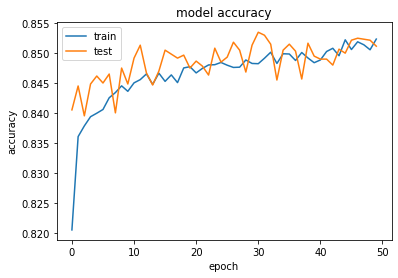

In [ ]:
model =keras.Sequential([keras.layers.Flatten(input_shape=(n_features,)),
        keras.layers.Dense(128,activation="relu"),
        keras.layers.Dense(128,activation="relu"),
        keras.layers.Dense(20,activation="softmax")])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
history=model.fit(train_X, train_y, epochs=50, batch_size=8, verbose=0, validation_data=(test_X,test_y))
test_loss,test_acc=model.evaluate(test_X, test_y)
print("Tested Result:",test_acc*100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

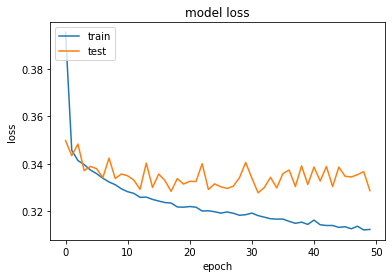

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()